In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import os

def getAllFileNamesOnThisDirectory(pathroot : str, isAddFile=True, isAddDir=False):
    fileNames = []
    for fileName in os.listdir(pathroot):
        if os.path.isdir(os.path.join(pathroot, fileName)):
            if isAddDir:
                fileNames.append(fileName)
        else:
            if isAddFile:
                fileNames.append(fileName)

    return fileNames

In [2]:
root_path = './PCGRL'
step_flag = True

dirs = getAllFileNamesOnThisDirectory(root_path, False, True)
all_csv_data = pd.DataFrame({'A' : []})
all_csv_data = all_csv_data.drop(['A'], axis=1)

for seed_folder_dir in dirs:
    files = getAllFileNamesOnThisDirectory(os.path.join(root_path,seed_folder_dir))
    for file_name in files:
        tmp = pd.read_csv(os.path.join(root_path,seed_folder_dir,file_name))
        if step_flag:
            tmp = tmp.drop(['Wall time'], axis=1)
            step_flag = False
        else: 
            tmp = tmp.drop(['Wall time', 'Step'], axis=1)
        tmp = tmp.rename(columns={'Value' : file_name[16:19]})

        all_csv_data = pd.concat([all_csv_data, tmp], axis=1)

all_csv_data = all_csv_data.dropna()

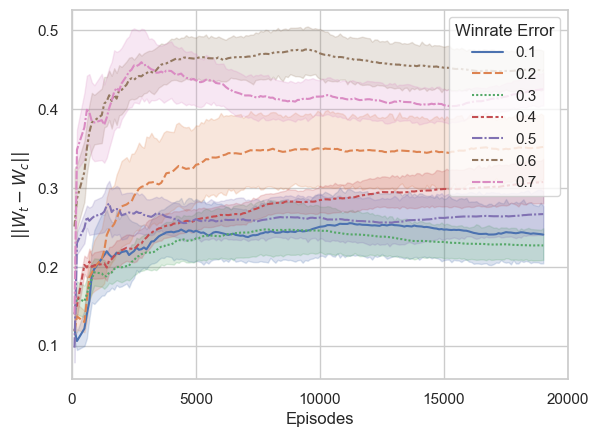

In [5]:
mean_data = pd.DataFrame({'A' : []})
mean_data = mean_data.drop(['A'], axis=1)

std_data = pd.DataFrame({'A' : []})
std_data = std_data.drop(['A'], axis=1)

values = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7']

for value in values:
    mean_data[value] = all_csv_data[value].mean(axis=1)
    std_data[value] = all_csv_data[value].std(axis=1)

sns.set()
sns.set_style('whitegrid')
fig, ax = plt.subplots()
x = all_csv_data['Step']

sns.lineplot(all_csv_data.set_index(keys='Step').ewm(span = 3600).mean())
# for value in values:
#     plt.plot(x, mean_data[value].ewm(span = 3600).mean(), label=value)
#     plt.fill_between(x, mean_data[value].ewm(span = 3600).mean() - std_data[value].ewm(span = 3600).mean(), 
#                      mean_data[value].ewm(span = 3600).mean() + std_data[value].ewm(span = 3600).mean(), alpha=0.2)

# ax.set_ylim(0,1.0)
ax.set_xlim(0, 20000)
plt.xticks([0, 5000, 10000, 15000, 20000])
ax.set_xlabel('Episodes')
ax.set_ylabel('$||W_t - W_c||$')
plt.legend(loc='upper right', title='Winrate Error')
plt.savefig("myImagePDF3.pdf", format="pdf", bbox_inches="tight")